# Import thư viện

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Khởi tạo hệ số mô hình

In [ ]:
# Initial conditions
A0 = 0
B0 = 0
K0 = 0
L0 = 0
T0 = 0
U0 = 0

initial_conditions = [A0, B0, K0, L0, T0, U0]

# Hàm intake

## Hàm số

### Hàm rời rạc

Hàm rời rạc, nhận đầu vào tại các thời điểm tuỳ chọn.
$$I(t) = \begin{cases}A_i & \text{if } t = T_i\\ 0 & \text{otherwise} \end{cases}$$
với $T_i \in T$ là tập hợp các thời điểm ăn socola.

In [ ]:
intake_times = [0, 1, 1.1, 10, 10.1, 20, 20.1, 30]
intake_values = [0, 13, 0, 13, 0, 13, 0, 0]

intake = interp1d(intake_times, intake_values, kind="previous", fill_value="extrapolate")

### Hàm sin

Hàm sin tuần hoàn.
$$I(t) = a\sin \left(\dfrac{2\pi t}{T} \right)$$
Với $T$ là số tuần hoàn, $a$ là hệ số socola.

In [ ]:
def intake_sine(t):
    return 1 * (np.sin(2 * np.pi * t / 240) + 1)

### Hàm Gaussian

Hàm mũ Gaussian.
$$I(t) = ae^{-\dfrac{(t-\mu)^2}{2\sigma^2}}$$


In [ ]:
def intake_gauss(t):
    return 100 * np.exp(-0.001 * (t - 10)**2)

In [ ]:
def intake_gauss(t):
    return 1 * np.exp(-1 * (t - 10)**2) + np.exp(-1 * (t - 150)**2)

In [ ]:
def intake_gauss(t):
    return 1 * np.exp(-0.01 * (t - 10)**2)

### Hàm Sigmoid

Hàm sigmoid
$$I(t) = a \cdot \dfrac{e^{-c(x-b)}}{e^{-c(x-b)} + 1} + k$$

In [ ]:
def sigmoid(a, b, c, k, t):
    exp_component = np.clip(np.exp(-(c * (t - b))), 1e-10, 1e10)
    return a * exp_component / (exp_component + 1) + k

In [ ]:
def intake_sigmoid(t):
    a1, k1 = 3, 1.3
    a2, k2 = 3, 1.3
    a3, k3 = 3, 1.3

    f = sigmoid(a1, 3, -10, k1, t)
    g = sigmoid(a1, 20, 10, k1, t)

    f1 = sigmoid(a2, 100, -10, k2, t)
    g1 = sigmoid(a2, 120, 10, k2, t)

    f2 = sigmoid(a3, 680, -10, k3, t)
    g2 = sigmoid(a3, 700, 10, k3, t)

    return f + g - (a1 + 2*k1) + f1 + g1 - (a2 + 2*k2) + f2 + g2 - (a3 + 2*k3)

In [ ]:
def intake_sigmoid(t):
    a, k = 3, 1.3
    f = sigmoid(a, 100, -7, k, t)
    g = sigmoid(a, 130, 7, k, t)

    return f + g - (a + 2*k)

In [ ]:
def sigmoid(a, b, c, k, t):
    exp_component = np.clip(np.exp(-(c * (t - b))), 1e-10, 1e10)
    return a * exp_component / (exp_component + 1) + k

def intake(start, end, amount, t):
    f = sigmoid(amount, start, -10, 0, t)
    g = sigmoid(amount, end, 10, 0, t)

    return f + g - (amount)

def intake_random(intake_dates, t):
    total_intake = None

    for tup in intake_dates:
        start = tup[0]
        end = tup[1]
        amount = tup[2]

        total_intake += intake(start, end, amount, t)

    return total_intake

## Đồ thị

Biểu diễn hàm nhận vào dưới dạng đồ thị.

In [ ]:
# Define the time range
t = np.linspace(0, 300, 500)  # From t = 0 to t = 200 with 500 points

# Calculate y values
# y_sine = intake_sine(t)
# y_gauss = intake_gauss(t)
y_sigmoid = intake_sigmoid(t)

<ipython-input-2-0a79347ea0ed>:2: RuntimeWarning: overflow encountered in exp
  exp_component = np.clip(np.exp(-(c * (t - b))), 1e-10, 1e10)


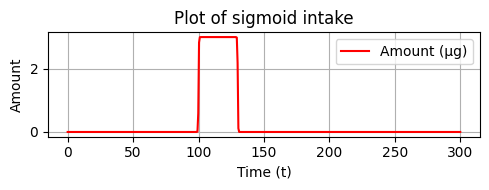

In [ ]:
# Plot the functions
plt.figure(figsize=(5, 2))

# # First subplot for the sine function
# plt.subplot(3, 1, 1)
# plt.plot(t, y_sine, color='blue')
# plt.xlabel('Time (t)')
# plt.ylabel('Sine')
# plt.title(r'Plot of sine intake')
# plt.legend()
# plt.grid()

# # Second subplot for the Gaussian function
# plt.subplot(3, 1, 2)
# plt.plot(t, y_gauss, color='green')
# plt.xlabel('Time (t)')
# plt.ylabel('Gaussian')
# plt.title(r'Plot of gaussian intake')
# plt.legend()
# plt.grid()

# Third subplot for the sigmoid function
# plt.subplot(3, 1, 3)
plt.plot(t, y_sigmoid, label='Amount (μg)',color='red')
plt.xlabel('Time (t)')
plt.ylabel('Amount')
plt.title(r'Plot of sigmoid intake')
plt.legend()
plt.grid()

# Adjust layout to prevent overlapping
plt.tight_layout()

plt.savefig('intake.pdf', format='pdf')

plt.show()

## Chọn hàm intake

In [ ]:
intake = intake_sigmoid

## Hàm intake tổng

In [ ]:
def sigmoid(a, b, c, k, t):
    exp_component = np.clip(np.exp(-(c * (t - b))), 1e-10, 1e10)
    return a * exp_component / (exp_component + 1) + k

def intake(start, end, amount, t):
    f = sigmoid(amount, start, -10, 0, t)
    g = sigmoid(amount, end, 10, 0, t)

    return f + g - (amount)

def intake_random(intake_dates, t):
    total_intake = 0.0

    for tup in intake_dates:
        start = tup[0]
        end = tup[1]
        amount = tup[2]

        total_intake += intake(start, end, amount, t)

    return total_intake

In [ ]:
intake_dates = [(3, 10, 2), (20, 35, 2), (40, 55, 1)]

<ipython-input-6-98941906de73>:2: RuntimeWarning: overflow encountered in exp
  exp_component = np.clip(np.exp(-(c * (t - b))), 1e-10, 1e10)


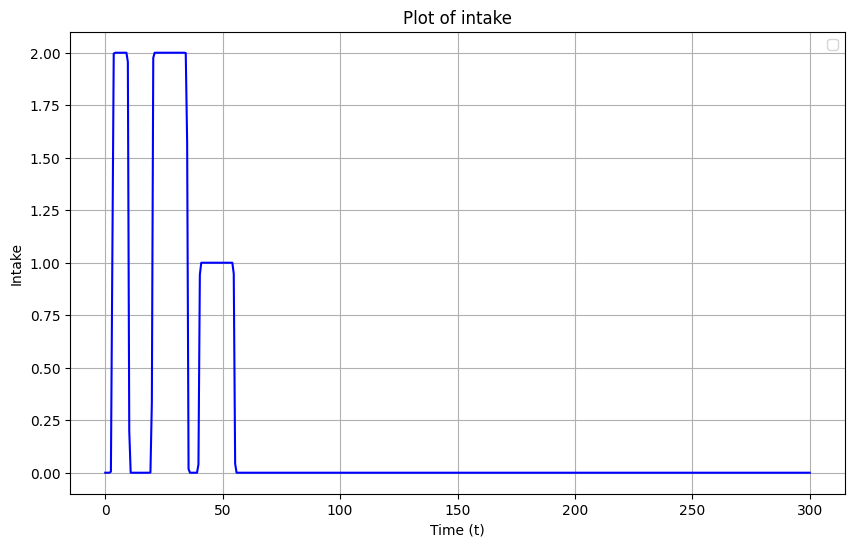

In [ ]:
# Define the time range
t = np.linspace(0, 300, 500)  # From t = 0 to t = 200 with 500 points

# Calculate y values
y = intake_random(intake_dates, t)

# Plot the functions
plt.figure(figsize=(10, 6))

# First subplot for the sine function
plt.subplot(1, 1, 1)
plt.plot(t, y, color='blue')
plt.xlabel('Time (t)')
plt.ylabel('Intake')
plt.title(r'Plot of intake')
plt.legend()
plt.grid()

plt.show()

# Mô hình

## Model 1

Model này không đề cập đến khả năng chịu tải tối đa của từng cơ quan.

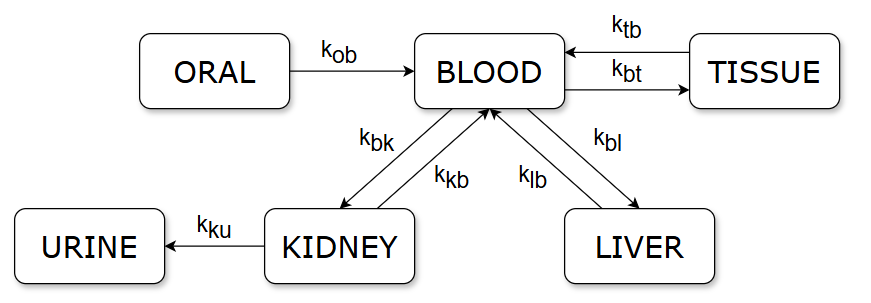

In [ ]:
# Parameters
a2 = 0.25
a4 = 0.6
a6 = 0.15
a8 = 0.7
a5 = 0.38
a7 = 0.08

In [ ]:
def nickel_competition(t, y):
    A, B, K, L, T, U = y
    I = intake(t)

    dA_dt = I - a2 * A
    dB_dt = a2 * A - (a4 + a5 + a6) * B
    dK_dt = a4 * B - a8 * K
    dL_dt = a6 * B - a8 * L
    dT_dt = a5 * B - a8 * T
    dU_dt = a8 * (K + L + T)
    return [dA_dt, dB_dt, dK_dt, dL_dt, dT_dt, dU_dt]

<ipython-input-118-0a79347ea0ed>:2: RuntimeWarning: overflow encountered in exp
  exp_component = np.clip(np.exp(-(c * (t - b))), 1e-10, 1e10)


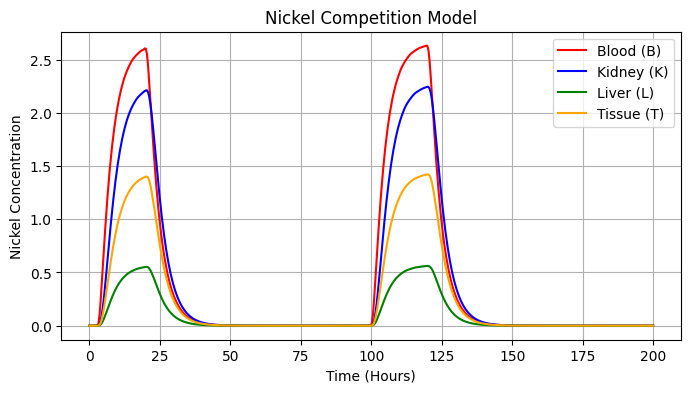

In [ ]:
# Time points (in hours)
t_span = [0, 200]
t_eval = np.linspace(t_span[0], t_span[1], 500)

solution = solve_ivp(nickel_competition, t_span, initial_conditions, t_eval=t_eval)

plt.figure(figsize=(8, 4))
plt.plot(solution.t, solution.y[1], label='Blood (B)', color='red')
plt.plot(solution.t, solution.y[2], label='Kidney (K)', color='blue')
plt.plot(solution.t, solution.y[3], label='Liver (L)', color='green')
plt.plot(solution.t, solution.y[4], label='Tissue (T)', color='orange')
plt.xlabel('Time (Hours)')
plt.ylabel('Nickel Concentration')
plt.title('Nickel Competition Model')
plt.legend()
plt.grid()
plt.show()

## Model 2

Mô hình này đề cập đến khả năng chịu tải tối đa của nickel ở từng cơ quan.

In [ ]:
# Parameters
a2 = 0.25
a4 = 0.6
a6 = 0.15
a8 = 0.7
a5 = 0.38
a7 = 0.08

K_max, T_max, L_max = 20, 50, 10
B_max = 300
U_max = 30

In [ ]:
def nickel_model(t, y):
    A, B, K, L, T, U = y
    I = intake(t)

    # Rate constants or max rates
    k2 = a2
    k4 = a4 * K * (1 - K / B_max)
    k5 = a5 * T * (1 - T / B_max)
    k6 = a6 * L * (1 - L / B_max)
    k8 = a8

    # Differential equations
    dA_dt = I - k2 * A
    dB_dt = k2 * A - (k4 + k5 + k6) * B
    dK_dt = a4 * B - k8 * K
    dL_dt = a6 * B - k8 * L
    dT_dt = a5 * B - k8 * T
    dU_dt = k8 * (K + L + T)

    return [dA_dt, dB_dt, dK_dt, dL_dt, dT_dt, dU_dt]

<ipython-input-118-0a79347ea0ed>:2: RuntimeWarning: overflow encountered in exp
  exp_component = np.clip(np.exp(-(c * (t - b))), 1e-10, 1e10)


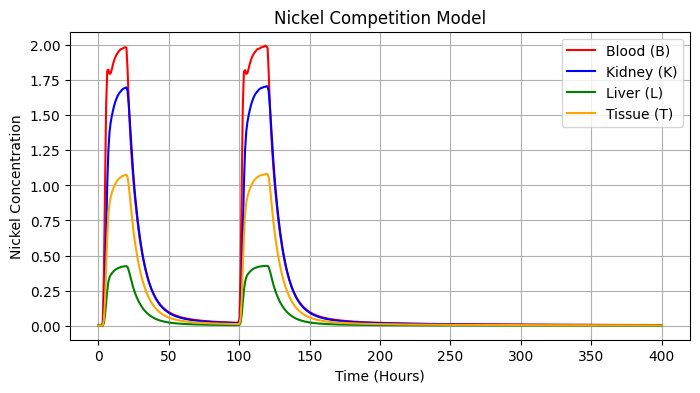

In [ ]:
# Time points (in hours)
t_span = [0, 400]
t_eval = np.linspace(t_span[0], t_span[1], 500)

solution = solve_ivp(nickel_model, t_span, initial_conditions, t_eval=t_eval)

plt.figure(figsize=(8, 4))
plt.plot(solution.t, solution.y[1], label='Blood (B)', color='red')
plt.plot(solution.t, solution.y[2], label='Kidney (K)', color='blue')
plt.plot(solution.t, solution.y[3], label='Liver (L)', color='green')
plt.plot(solution.t, solution.y[4], label='Tissue (T)', color='orange')
plt.xlabel('Time (Hours)')
plt.ylabel('Nickel Concentration')
plt.title('Nickel Competition Model')
plt.legend()
plt.grid()
plt.show()

## Model 3

In [ ]:
# Parameters
a2 = 0.25
a4 = 0.6
a6 = 0.15
a8 = 0.7
a5 = 0.38
a7 = 0.08

K_max, T_max, L_max = 100, 100, 100
B_max = 20
U_max = 30

In [ ]:
def nickel_model(t, y):
    A, B, K, L, T, U = y
    I = intake(t)

    # Rate constants or max rates
    k2 = a2
    k4 = a4 * K * (1 - K / B_max)
    k5 = a5 * T * (1 - T / B_max)
    k6 = a6 * L * (1 - L / B_max)
    k8 = a8 * np.exp(-0.01 * t)

    # Differential equations
    dA_dt = I - k2 * A
    dB_dt = k2 * A - (k4 + k5 + k6) * B
    dK_dt = a4 * B - k8 * K
    dL_dt = a6 * B - k8 * L
    dT_dt = a5 * B - k8 * T
    dU_dt = k8 * (K + L + T)

    return [dA_dt, dB_dt, dK_dt, dL_dt, dT_dt, dU_dt]

<ipython-input-118-0a79347ea0ed>:2: RuntimeWarning: overflow encountered in exp
  exp_component = np.clip(np.exp(-(c * (t - b))), 1e-10, 1e10)


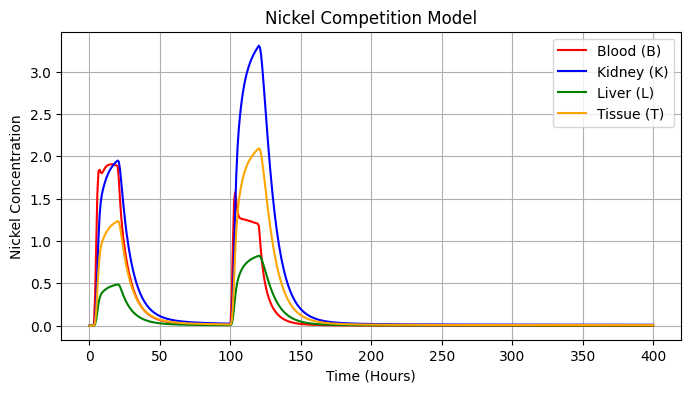

In [ ]:
# Time points (in hours)
t_span = [0, 400]
t_eval = np.linspace(t_span[0], t_span[1], 500)

solution = solve_ivp(nickel_model, t_span, initial_conditions, t_eval=t_eval)

plt.figure(figsize=(8, 4))
plt.plot(solution.t, solution.y[1], label='Blood (B)', color='red')
plt.plot(solution.t, solution.y[2], label='Kidney (K)', color='blue')
plt.plot(solution.t, solution.y[3], label='Liver (L)', color='green')
plt.plot(solution.t, solution.y[4], label='Tissue (T)', color='orange')
plt.xlabel('Time (Hours)')
plt.ylabel('Nickel Concentration')
plt.title('Nickel Competition Model')
plt.legend()
plt.grid()
plt.show()

## Model 4

a2 = 0.25
a4 = 0.6
a6 = 0.15
a8 = 0.7
a5 = 0.38
a7 = 0.08

In [ ]:
K_max, T_max, L_max = 45, 21, 37
a2 = 0.15

a4 = 0.2
a6 = 0.1
a5 = 0.05

a8 = 0.7

n = 0.65

epsilon = 1  # Small epsilon to prevent division by zero

In [ ]:
def nickel_model(t, y):
    A, B, K, L, T, U = y
    I = intake(t)

    # Saturable rates with Hill function form for absorption into organs
    k2 = a2
    k4 = a4 * (1 - K / K_max)  # to kidneys
    k5 = a5 * (1 - L / L_max)  # to liver
    k6 = a6 * (1 - T / T_max)  # to tissues

    # Excretion rate using saturation term in kidneys and liver
    k_kidney = a4 * ((K**n) / (K + (K_max**n)/2 + epsilon))
    k_liver = a6 * ((L**n) / (L + (L_max**n)/2 + epsilon))
    k_tissue = a5 * ((T**n) / (T + (T_max**n)/2 + epsilon))

    # Differential equations
    dA_dt = I - k2 * A
    dB_dt = k2 * A - (k4 + k5 + k6) * B
    dK_dt = k4 * B - k_kidney * K
    dL_dt = k6 * B - k_liver * L
    dT_dt = k5 * B - k_tissue * T
    dU_dt = k_kidney * K + k_liver * L + k_tissue * T  # Sum of excretion

    return [dA_dt, dB_dt, dK_dt, dL_dt, dT_dt, dU_dt]

<ipython-input-118-0a79347ea0ed>:2: RuntimeWarning: overflow encountered in exp
  exp_component = np.clip(np.exp(-(c * (t - b))), 1e-10, 1e10)
<ipython-input-205-cd1f01e2acbb>:12: RuntimeWarning: invalid value encountered in scalar power
  k_kidney = a4 * ((K**n) / (K + (K_max**n)/2 + epsilon))
<ipython-input-205-cd1f01e2acbb>:13: RuntimeWarning: invalid value encountered in scalar power
  k_liver = a6 * ((L**n) / (L + (L_max**n)/2 + epsilon))
<ipython-input-205-cd1f01e2acbb>:14: RuntimeWarning: invalid value encountered in scalar power
  k_tissue = a5 * ((T**n) / (T + (T_max**n)/2 + epsilon))


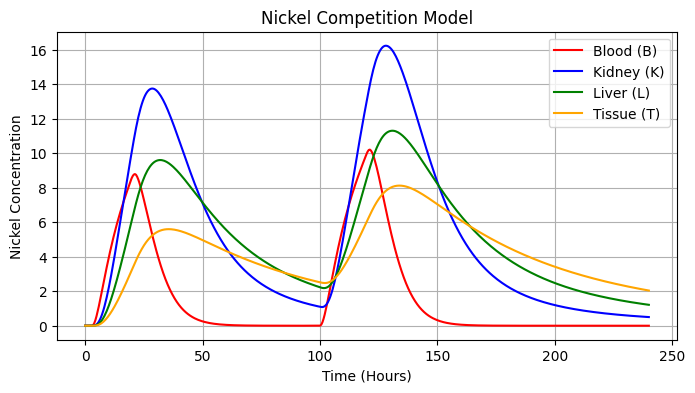

In [ ]:
# Time points (in hours)
t_span = [0, 10 * 24]
t_eval = np.linspace(t_span[0], t_span[1], 500)

solution = solve_ivp(nickel_model, t_span, initial_conditions, t_eval=t_eval)

plt.figure(figsize=(8, 4))
plt.plot(solution.t, solution.y[1], label='Blood (B)', color='red')
plt.plot(solution.t, solution.y[2], label='Kidney (K)', color='blue')
plt.plot(solution.t, solution.y[3], label='Liver (L)', color='green')
plt.plot(solution.t, solution.y[4], label='Tissue (T)', color='orange')
plt.xlabel('Time (Hours)')
plt.ylabel('Nickel Concentration')
plt.title('Nickel Competition Model')
plt.legend()
plt.grid()
plt.show()

## Model 5

Với $k_{ij}$ là tỉ lệ chuyển từ cơ quan $i$ sang cơ quan $j$, ta có được

$$\begin{cases}
\dfrac{dA}{dt} &= I - k_{\text{ab}}\cdot A\\
\dfrac{dB}{dt} &= k_{\text{ab}} \cdot A - (k_{\text{bk}} + k_{\text{bl}} + k_{\text{bt}})\cdot B\\
\dfrac{dK}{dt} &= k_{\text{bk}} \cdot B - k_{\text{ku}} \cdot K\\
\dfrac{dL}{dt} &= k_{\text{bl}} \cdot B - k_{\text{lu}} \cdot K\\
\dfrac{dT}{dt} &= k_{\text{bt}} \cdot B - k_{\text{tu}} \cdot K\\
\dfrac{dU}{dt} &= k_{\text{ku}} \cdot K + k_{\text{lu}} \cdot L + k_{\text{tu}} \cdot T + (1-(k_{\text{bk}} + k_{\text{bl}} + k_{\text{bt}})) \cdot B\\
\end{cases}$$

Các hệ số tỉ lệ $k_{ij}$ sẽ bị ảnh hưởng nếu cơ quan hấp thụ quá nhiều, ta có

$$\begin{cases}k_{\text{ab}} &= r_{\text{ab}} \cdot \left(1 - \dfrac{Fe}{Fe_{\max}}\right)\\
k_{\text{bk}} &= r_{\text{bk}} \cdot \left(1 - \dfrac{K}{K_{\max}}\right)\\
k_{\text{bl}} &= r_{\text{bl}} \cdot \left(1 - \dfrac{L}{L_{\max}}\right)\\
k_{\text{bt}} &= r_{\text{bt}} \cdot \left(1 - \dfrac{T}{T_{\max}}\right)\\
k_{\text{ku}} &= r_{\text{ku}} \cdot \left(1 - \dfrac{K}{K_{\max}}\right)\\
k_{\text{lu}} &= r_{\text{lu}} \cdot \left(1 - \dfrac{L}{L_{\max}}\right)\\
k_{\text{tu}} &= r_{\text{tu}} \cdot \left(1 - \dfrac{T}{T_{\max}}\right)
 \end{cases}$$

 Trong đó $k$ là các tỉ lệ chuyển đổi tính theo $t$, $r$ là các tỉ lệ chuyển đổi trong ngữ cảnh không có ảnh hưởng (hằng số).

In [ ]:
K_max, T_max, L_max = 45, 21, 37
a2 = 0.2

a4 = 0.2
a6 = 0.09
a5 = 0.04

n = 0.632

epsilon = 1  # Small epsilon to prevent division by zero

Fe = 8
Fe_max = 12

slow_rate = (1 - Fe / Fe_max)

In [ ]:
def nickel_model(t, y):
    A, B, K, L, T, U = y
    I = intake(t)

    # Saturable rates with Hill function form for absorption into organs
    k2 = a2 * slow_rate
    k4 = a4 * (1 - K / K_max)  # to kidneys
    k5 = a5 * (1 - L / L_max)  # to liver
    k6 = a6 * (1 - T / T_max)  # to tissues

    # Excretion rate using saturation term in kidneys and liver
    k_kidney = a4 * ((K**n) / (K + (K_max**n)/2 + epsilon)) * slow_rate
    k_liver = a6 * ((L**n) / (L + (L_max**n)/2 + epsilon)) * slow_rate
    k_tissue = a5 * ((T**n) / (T + (T_max**n)/2 + epsilon)) * slow_rate

    # Differential equations
    dA_dt = I - k2 * A
    dB_dt = k2 * A - (k4 + k5 + k6) * B
    dK_dt = k4 * B - k_kidney * K
    dL_dt = k6 * B - k_liver * L
    dT_dt = k5 * B - k_tissue * T
    dU_dt = k_kidney * K + k_liver * L + k_tissue * T  # Sum of excretion

    return [dA_dt, dB_dt, dK_dt, dL_dt, dT_dt, dU_dt]

<ipython-input-118-0a79347ea0ed>:2: RuntimeWarning: overflow encountered in exp
  exp_component = np.clip(np.exp(-(c * (t - b))), 1e-10, 1e10)
<ipython-input-208-b21ca1cf04c7>:12: RuntimeWarning: invalid value encountered in scalar power
  k_kidney = a4 * ((K**n) / (K + (K_max**n)/2 + epsilon)) * slow_rate
<ipython-input-208-b21ca1cf04c7>:13: RuntimeWarning: invalid value encountered in scalar power
  k_liver = a6 * ((L**n) / (L + (L_max**n)/2 + epsilon)) * slow_rate
<ipython-input-208-b21ca1cf04c7>:14: RuntimeWarning: invalid value encountered in scalar power
  k_tissue = a5 * ((T**n) / (T + (T_max**n)/2 + epsilon)) * slow_rate


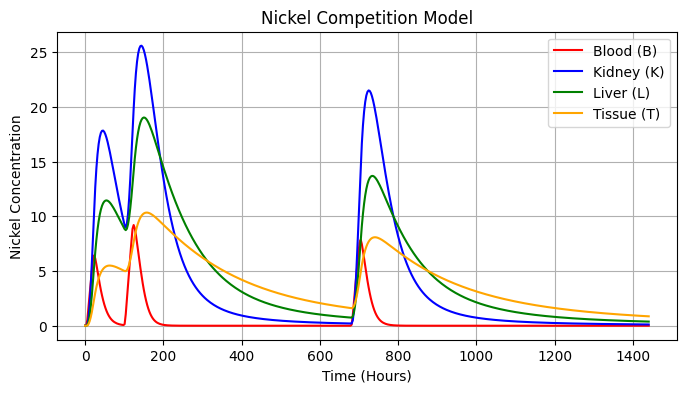

In [ ]:
# Time points (in hours)
t_span = [0, 60 * 24]
t_eval = np.linspace(t_span[0], t_span[1], 500)

solution = solve_ivp(nickel_model, t_span, initial_conditions, t_eval=t_eval)

plt.figure(figsize=(8, 4))
plt.plot(solution.t, solution.y[1], label='Blood (B)', color='red')
plt.plot(solution.t, solution.y[2], label='Kidney (K)', color='blue')
plt.plot(solution.t, solution.y[3], label='Liver (L)', color='green')
plt.plot(solution.t, solution.y[4], label='Tissue (T)', color='orange')
plt.xlabel('Time (Hours)')
plt.ylabel('Nickel Concentration')
plt.title('Nickel Competition Model')
plt.legend()
plt.grid()
plt.show()

## Model 6

In [ ]:
K_max, T_max, L_max = 45, 21, 37
a2 = 0.2

a4 = 0.4 # kidney
a5 = 0.1 # liver
a6 = 0.09 # tissue

a41 = 0.09
a51 = 0.018
a61 = 0.0055

n = 0.632

epsilon = 1  # Small epsilon to prevent division by zero

Fe = 8
Fe_max = 12

slow_rate = (1 - Fe / Fe_max)

In [ ]:
def nickel_model(t, y):
    A, B, K, L, T, U = y
    I = intake(t)

    # Saturable rates with Hill function form for absorption into organs
    k2 = a2 * (1 - Fe / Fe_max)
    k4 = a4 * (1 - K / K_max)  # to kidneys
    k5 = a5 * (1 - L / L_max)  # to liver
    k6 = a6 * (1 - T / T_max)  # to tissues

    # Excretion rate using saturation term in kidneys and liver
    k_kidney = a41 * (1 - K / K_max)
    k_liver = a51 * (1 - L / L_max)
    k_tissue = a61 * (1 - T / T_max)

    # Differential equations
    dA_dt = I - k2 * A
    dB_dt = k2 * A - (k4 + k5 + k6) * B
    dK_dt = k4 * B - k_kidney * K
    dL_dt = k5 * B - k_liver * L
    dT_dt = k6 * B - k_tissue * T
    dU_dt = k_kidney * K + k_liver * L + k_tissue * T  + (1 - (k4 + k5 + k6))*B # Sum of excretion

    return [dA_dt, dB_dt, dK_dt, dL_dt, dT_dt, dU_dt]

<ipython-input-118-0a79347ea0ed>:2: RuntimeWarning: overflow encountered in exp
  exp_component = np.clip(np.exp(-(c * (t - b))), 1e-10, 1e10)


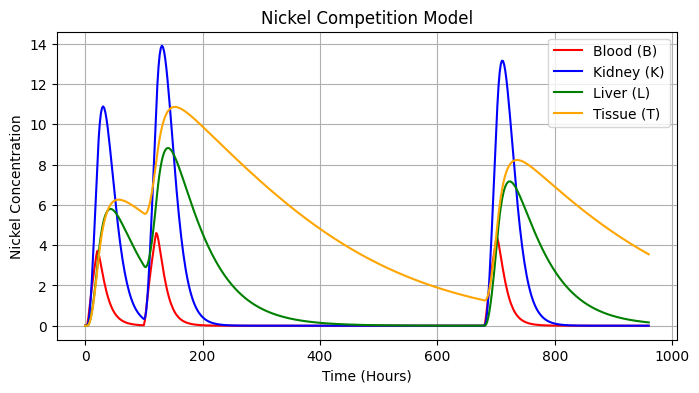

In [ ]:
# Time points (in hours)
t_span = [0, 40*24]
t_eval = np.linspace(t_span[0], t_span[1], 500)

solution = solve_ivp(nickel_model, t_span, initial_conditions, t_eval=t_eval)

plt.figure(figsize=(8, 4))
plt.plot(solution.t, solution.y[1], label='Blood (B)', color='red')
plt.plot(solution.t, solution.y[2], label='Kidney (K)', color='blue')
plt.plot(solution.t, solution.y[3], label='Liver (L)', color='green')
plt.plot(solution.t, solution.y[4], label='Tissue (T)', color='orange')
plt.xlabel('Time (Hours)')
plt.ylabel('Nickel Concentration')
plt.title('Nickel Competition Model')
plt.legend()

plt.grid()
plt.show()

## Model 7

In [ ]:
K_max, T_max, L_max = 45, 21, 37
a2 = 0.2

a4 = 0.4 # kidney
a5 = 0.1 # liver
a6 = 0.09 # tissue

a41 = 0.09
a51 = 0.018
a61 = 0.0055

n = 0.632

epsilon = 1  # Small epsilon to prevent division by zero

Fe = 8
Fe_max = 12

slow_rate = (1 - Fe / Fe_max)

gamma = 0.09

In [ ]:
def nickel_model(t, y):
    A, B, K, L, T, U = y
    I = intake(t)

    # Saturable rates with Hill function form for absorption into organs
    k2 = a2 * (1 - Fe / Fe_max)
    k4 = (a4) / (1 + gamma * K) # to kidneys
    k5 = (a5) / (1 + gamma * L) # to liver
    k6 = (a6) / (1 + gamma * T)  # to tissues

    # Excretion rate using saturation term in kidneys and liver
    k_kidney = (a41) / (1 + gamma * K)
    k_liver = (a51) / (1 + gamma * L)
    k_tissue = (a61) / (1 + gamma * T)

    # Differential equations
    dA_dt = I - k2 * A
    dB_dt = k2 * A - (k4 + k5 + k6) * B
    dK_dt = k4 * B - k_kidney * K
    dL_dt = k5 * B - k_liver * L
    dT_dt = k6 * B - k_tissue * T
    dU_dt = k_kidney * K + k_liver * L + k_tissue * T  + (1 - (k4 + k5 + k6))*B # Sum of excretion

    return [dA_dt, dB_dt, dK_dt, dL_dt, dT_dt, dU_dt]

<ipython-input-5-0a79347ea0ed>:2: RuntimeWarning: overflow encountered in exp
  exp_component = np.clip(np.exp(-(c * (t - b))), 1e-10, 1e10)


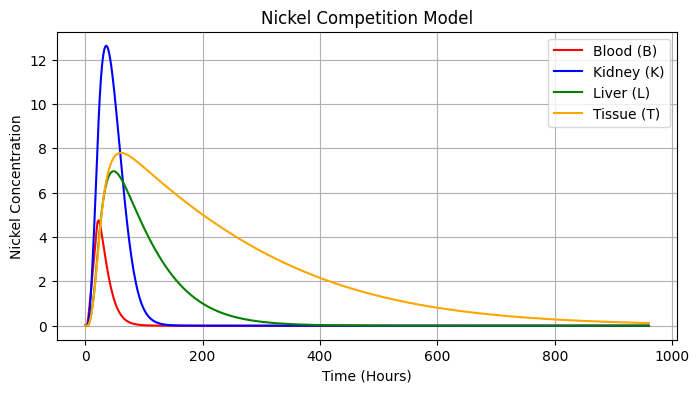

In [ ]:
# Time points (in hours)
t_span = [0, 40*24]
t_eval = np.linspace(t_span[0], t_span[1], 500)

solution = solve_ivp(nickel_model, t_span, initial_conditions, t_eval=t_eval)

plt.figure(figsize=(8, 4))
plt.plot(solution.t, solution.y[1], label='Blood (B)', color='red')
plt.plot(solution.t, solution.y[2], label='Kidney (K)', color='blue')
plt.plot(solution.t, solution.y[3], label='Liver (L)', color='green')
plt.plot(solution.t, solution.y[4], label='Tissue (T)', color='orange')
plt.xlabel('Time (Hours)')
plt.ylabel('Nickel Concentration')
plt.title('Nickel Competition Model')
plt.legend()

plt.grid()
plt.show()

## Model 8

In [ ]:
K_max, T_max, L_max = 45, 21, 37
a2 = 0.2

a4 = 0.4 # kidney
a5 = 0.1 # liver
a6 = 0.09 # tissue

a41 = 0.09
a51 = 0.018
a61 = 0.0055

n = 0.632

epsilon = 1  # Small epsilon to prevent division by zero

Fe = 8
Fe_max = 12

slow_rate = (1 - Fe / Fe_max)

gamma = 0.05

In [ ]:
def nickel_model(t, y):
    A, B, K, L, T, U = y
    I = intake(t)

    # Saturable rates with Hill function form for absorption into organs
    k2 = a2 * (1 - Fe / Fe_max)
    k4 = (a4) / (1 + gamma * K) * (1 - K / K_max) # to kidneys
    k5 = (a5) / (1 + gamma * L) * (1 - L / L_max) # to liver
    k6 = (a6) / (1 + gamma * T) * (1 - T / T_max)  # to tissues

    # Excretion rate using saturation term in kidneys and liver
    k_kidney = (a41) / (1 + gamma * K) * (1 - K / K_max)
    k_liver = (a51) / (1 + gamma * L) * (1 - L / L_max)
    k_tissue = (a61) / (1 + gamma * T) * (1 - T / T_max)

    # Differential equations
    dA_dt = I - k2 * A
    dB_dt = k2 * A - (k4 + k5 + k6) * B
    dK_dt = k4 * B - k_kidney * K
    dL_dt = k5 * B - k_liver * L
    dT_dt = k6 * B - k_tissue * T
    dU_dt = k_kidney * K + k_liver * L + k_tissue * T  + (1 - (k4 + k5 + k6))*B # Sum of excretion

    return [dA_dt, dB_dt, dK_dt, dL_dt, dT_dt, dU_dt]

<ipython-input-5-0a79347ea0ed>:2: RuntimeWarning: overflow encountered in exp
  exp_component = np.clip(np.exp(-(c * (t - b))), 1e-10, 1e10)


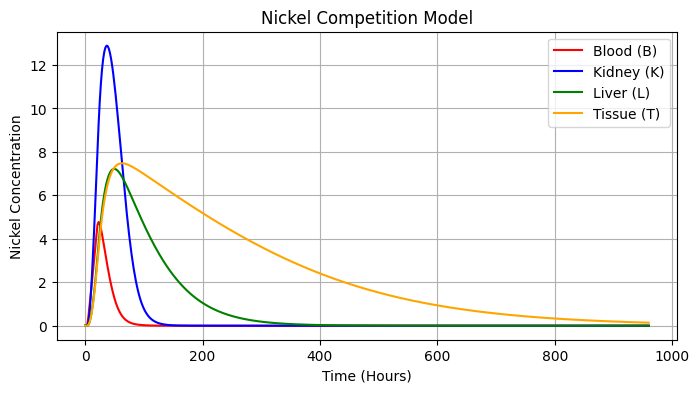

In [ ]:
# Time points (in hours)
t_span = [0, 40*24]
t_eval = np.linspace(t_span[0], t_span[1], 500)

solution = solve_ivp(nickel_model, t_span, initial_conditions, t_eval=t_eval)

plt.figure(figsize=(8, 4))
plt.plot(solution.t, solution.y[1], label='Blood (B)', color='red')
plt.plot(solution.t, solution.y[2], label='Kidney (K)', color='blue')
plt.plot(solution.t, solution.y[3], label='Liver (L)', color='green')
plt.plot(solution.t, solution.y[4], label='Tissue (T)', color='orange')
plt.xlabel('Time (Hours)')
plt.ylabel('Nickel Concentration')
plt.title('Nickel Competition Model')
plt.legend()

plt.grid()
plt.show()

In [ ]:
def rate(F, type='kidney', dir='in'):
    _max = 0.0
    init = 0.0

    if type == 'kidney' and dir == 'in':
        _init = a4
        _max = K_max
    elif type == 'liver' and dir == 'in':
        _init = a5
        _max = L_max
    elif type == 'tissue' and dir == 'in':
        _init = a6
        _max = T_max
    elif type == 'kidney' and dir == 'out':
        _init = a41
        _max = K_max
    elif type == 'liver' and dir == 'out':
        _init = a51
        _max = L_max
    elif type == 'tissue' and dir == 'out':
        _init = a61
        _max = T_max
    else:
        pass

    return (_init) / (1 + gamma * F) * (1 - F / _max)

Recovery rate for kidney.

In [ ]:
type = 'tissue'
dir = 'in'
if type == 'kidney':
    k = 2
elif type == 'liver':
    k = 3
elif type == 'tissue':
    k = 4
else:
    pass

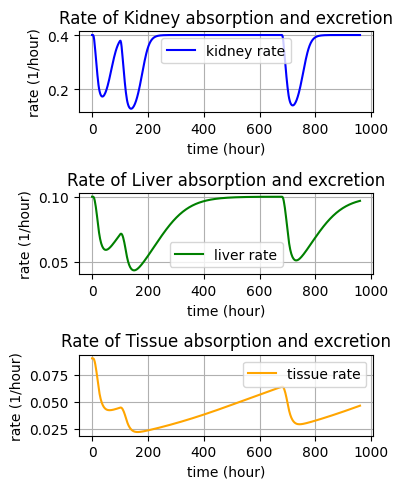

In [ ]:
plt.figure(figsize=(4, 5))

plt.subplot(3, 1, 1)
plt.plot(solution.t, rate(solution.y[2], 'kidney'), label='kidney rate', color='blue')
plt.xlabel('time (hour)')
plt.ylabel('rate (1/hour)')
plt.title(r'Rate of Kidney absorption and excretion')
plt.legend()
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(solution.t, rate(solution.y[3], 'liver'), label='liver rate', color='green')
plt.xlabel('time (hour)')
plt.ylabel('rate (1/hour)')
plt.title(r'Rate of Liver absorption and excretion')
plt.legend()
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(solution.t, rate(solution.y[4], 'tissue'), label='tissue rate', color='orange')
plt.xlabel('time (hour)')
plt.ylabel('rate (1/hour)')
plt.title(r'Rate of Tissue absorption and excretion')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

## Model 9

In [ ]:
K_max, T_max, L_max = 45, 21, 37
a2 = 0.2

a4 = 0.4 # kidney
a5 = 0.1 # liver
a6 = 0.09 # tissue

a41 = 0.09
a51 = 0.018
a61 = 0.0055

n = 0.632

epsilon = 1  # Small epsilon to prevent division by zero

Fe = 8
Fe_max = 12

slow_rate = (1 - Fe / Fe_max)

gamma = 0.05

In [ ]:
def nickel_model(t, y):
    A, B, K, L, T, U = y
    I = intake(t)
    c_in = -1
    c_out = -0.1
    a_in = 0.9
    a_out = 1.5

    # Saturable rates with Hill function form for absorption into organs
    k2 = (a2) * (1 - Fe / Fe_max)
    k4 = (a4) * sigmoid(a_in, 0, c_in, 0, K/K_max) # to kidneys
    k5 = (a5) * sigmoid(a_in, 0, c_in, 0, L/L_max) # to liver
    k6 = (a6) * sigmoid(a_in, 0, c_in, 0, T/T_max)  # to tissues

    # Excretion rate using saturation term in kidneys and liver
    k_kidney = (a41) * sigmoid(a_out, 0, c_out, 0, K/K_max)
    k_liver = (a51) * sigmoid(a_out, 0, c_out, 0, L/L_max)
    k_tissue = (a61) * sigmoid(a_out, 0, c_out, 0, T/T_max)

    # Differential equations
    dA_dt = I - k2 * A
    dB_dt = k2 * A - (k4 + k5 + k6) * B
    dK_dt = k4 * B - k_kidney * K
    dL_dt = k5 * B - k_liver * L
    dT_dt = k6 * B - k_tissue * T
    dU_dt = k_kidney * K + k_liver * L + k_tissue * T  + (1 - (k4 + k5 + k6))*B # Sum of excretion

    return [dA_dt, dB_dt, dK_dt, dL_dt, dT_dt, dU_dt]

<ipython-input-5-0a79347ea0ed>:2: RuntimeWarning: overflow encountered in exp
  exp_component = np.clip(np.exp(-(c * (t - b))), 1e-10, 1e10)


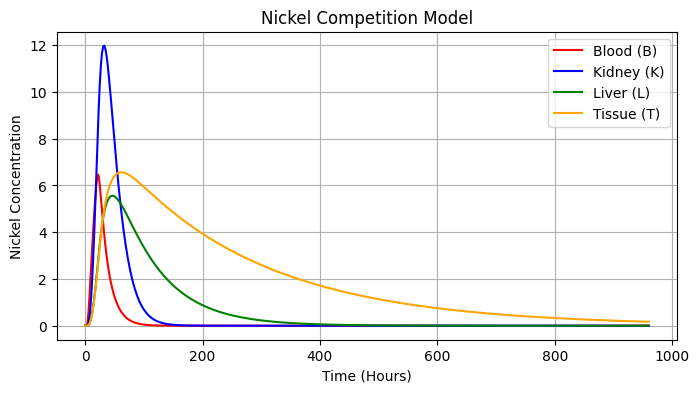

In [ ]:
# Time points (in hours)
t_span = [0, 40*24]
t_eval = np.linspace(t_span[0], t_span[1], 500)

solution = solve_ivp(nickel_model, t_span, initial_conditions, t_eval=t_eval)

plt.figure(figsize=(8, 4))
plt.plot(solution.t, solution.y[1], label='Blood (B)', color='red')
plt.plot(solution.t, solution.y[2], label='Kidney (K)', color='blue')
plt.plot(solution.t, solution.y[3], label='Liver (L)', color='green')
plt.plot(solution.t, solution.y[4], label='Tissue (T)', color='orange')
plt.xlabel('Time (Hours)')
plt.ylabel('Nickel Concentration')
plt.title('Nickel Competition Model')
plt.legend()

plt.grid()
plt.show()

## Model 10

In [ ]:
# Initial conditions
A0 = 0
B0 = 3
K0 = 4
L0 = 5
T0 = 4
U0 = 0

initial_conditions = [A0, B0, K0, L0, T0, U0]

In [ ]:
K_max, T_max, L_max = 45, 21, 37
a2 = 0.2

a4 = 0.4 # kidney
a5 = 0.1 # liver
a6 = 0.09 # tissue

a41 = 0.09
a51 = 0.018
a61 = 0.0055

n = 0.632

epsilon = 1  # Small epsilon to prevent division by zero

Fe = 8
Fe_max = 12

slow_rate = (1 - Fe / Fe_max)

In [ ]:
def nickel_model(t, y):
    A, B, K, L, T, U = y
    I = intake(t)
    c_in = -1
    c_out = -0.1
    a_in = 0.9
    a_out = 1.5
    # a, b, c, k, t

    # Saturable rates with Hill function form for absorption into organs
    k2 = a2 * (1 - Fe / Fe_max)
    k4 = a4 * (1 - K / K_max) * sigmoid(1, 0, -5, 0, B/B0 - 2.165) # to kidneys
    k5 = a5 * (1 - L / L_max) * sigmoid(1, 0, -5, 0, B/B0 - 2.165) # to liver
    k6 = a6 * (1 - T / T_max) * sigmoid(1, 0, -5, 0, B/B0 - 2.165) # to tissues

    # Excretion rate using saturation term in kidneys and liver
    k_kidney = a41 * (1 - K / K_max)  * sigmoid(1, 0, -5, 0, K/K0 - 1.95)
    k_liver = a51 * (1 - L / L_max)  * sigmoid(1, 0, -10, 0, L/L0 - 1.4)
    k_tissue = a61 * (1 - T / T_max) * sigmoid(1, 0, -5, 0, T/T0 - 1.55)

    # Differential equations
    dA_dt = I - k2 * A
    dB_dt = k2 * A - (k4 + k5 + k6) * B
    dK_dt = k4 * B - k_kidney * K
    dL_dt = k5 * B - k_liver * L
    dT_dt = k6 * B - k_tissue * T
    dU_dt = k_kidney * K + k_liver * L + k_tissue * T  + (1 - (k4 + k5 + k6))*B # Sum of excretion

    return [dA_dt, dB_dt, dK_dt, dL_dt, dT_dt, dU_dt]

<ipython-input-2-0a79347ea0ed>:2: RuntimeWarning: overflow encountered in exp
  exp_component = np.clip(np.exp(-(c * (t - b))), 1e-10, 1e10)


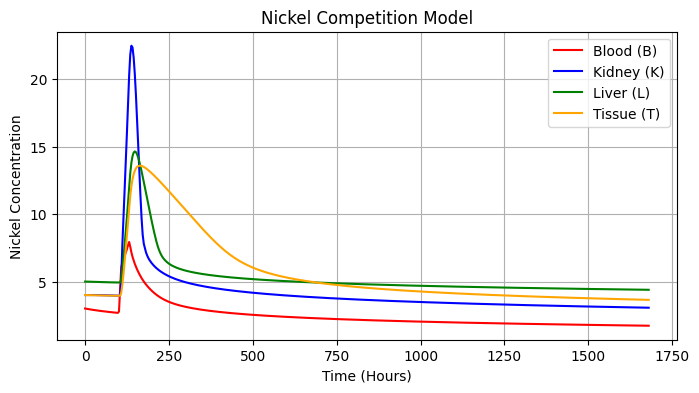

In [ ]:
# Time points (in hours)
t_span = [0, 70*24]
t_eval = np.linspace(t_span[0], t_span[1], 500)

solution = solve_ivp(nickel_model, t_span, initial_conditions, t_eval=t_eval)

plt.figure(figsize=(8, 4))
plt.plot(solution.t, solution.y[1], label='Blood (B)', color='red')
plt.plot(solution.t, solution.y[2], label='Kidney (K)', color='blue')
plt.plot(solution.t, solution.y[3], label='Liver (L)', color='green')
plt.plot(solution.t, solution.y[4], label='Tissue (T)', color='orange')
plt.xlabel('Time (Hours)')
plt.ylabel('Nickel Concentration')
plt.title('Nickel Competition Model')
plt.legend()

plt.grid()
plt.show()

## Model 11

In [ ]:
# Initial conditions
A0 = 0
B0 = 3
K0 = 4
L0 = 5
T0 = 4
U0 = 0

initial_conditions = [A0, B0, K0, L0, T0, U0]

In [ ]:
K_max, T_max, L_max = 45, 21, 37
a2 = 0.2

a4 = 0.4 # kidney
a5 = 0.1 # liver
a6 = 0.09 # tissue

a41 = 0.09
a51 = 0.018
a61 = 0.0055

n = 0.632

epsilon = 1  # Small epsilon to prevent division by zero

Fe = 8
Fe_max = 12

slow_rate = (1 - Fe / Fe_max)

In [ ]:
def nickel_model(t, y):
    A, B, K, L, T, U = y
    I = intake(t)
    c_in = -1
    c_out = -0.1
    a_in = 0.9
    a_out = 1.5
    # a, b, c, k, t

    # Saturable rates with Hill function form for absorption into organs
    k2 = a2 * (1 - Fe / Fe_max)
    k4 = a4 * (1 - K / K_max) * sigmoid(1+0.1, 0, -6, -0.1, B/B0 - 1.35) # to kidneys
    k5 = a5 * (1 - L / L_max) * sigmoid(1+0.1, 0, -6, -0.1, B/B0 - 1.35) # to liver
    k6 = a6 * (1 - T / T_max) * sigmoid(1+0.1, 0, -6, -0.1, B/B0 - 1.35) # to tissues

    # Excretion rate using saturation term in kidneys and liver
    k_kidney = a41 * (1 - K / K_max)  * sigmoid(1+0.1, 0, -6, -0.1, K/K0 - 1.35)
    k_liver = a51 * (1 - L / L_max)  * sigmoid(1+0.1, 0, -6, -0.1, L/L0 - 1.35)
    k_tissue = a61 * (1 - T / T_max) * sigmoid(1+0.1, 0, -6, -0.1, T/T0 - 1.35)

    # Differential equations
    dA_dt = I - k2 * A
    dB_dt = k2 * A - (k4 + k5 + k6) * B
    dK_dt = k4 * B - k_kidney * K
    dL_dt = k5 * B - k_liver * L
    dT_dt = k6 * B - k_tissue * T
    dU_dt = k_kidney * K + k_liver * L + k_tissue * T  + (1 - (k4 + k5 + k6))*B # Sum of excretion

    return [dA_dt, dB_dt, dK_dt, dL_dt, dT_dt, dU_dt]

<ipython-input-2-0a79347ea0ed>:2: RuntimeWarning: overflow encountered in exp
  exp_component = np.clip(np.exp(-(c * (t - b))), 1e-10, 1e10)


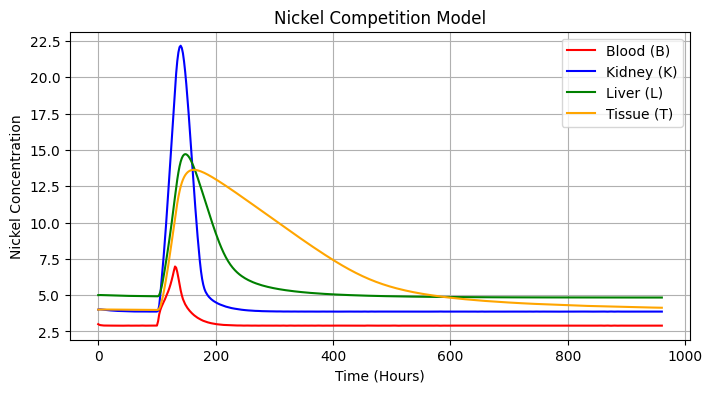

In [ ]:
# Time points (in hours)
t_span = [0, 40*24]
t_eval = np.linspace(t_span[0], t_span[1], 500)

solution = solve_ivp(nickel_model, t_span, initial_conditions, t_eval=t_eval)

plt.figure(figsize=(8, 4))
plt.plot(solution.t, solution.y[1], label='Blood (B)', color='red')
plt.plot(solution.t, solution.y[2], label='Kidney (K)', color='blue')
plt.plot(solution.t, solution.y[3], label='Liver (L)', color='green')
plt.plot(solution.t, solution.y[4], label='Tissue (T)', color='orange')
plt.xlabel('Time (Hours)')
plt.ylabel('Nickel Concentration')
plt.title('Nickel Competition Model')
plt.legend()

plt.grid()
plt.show()

# Tổng lượng tại thời điểm

Total concentration.

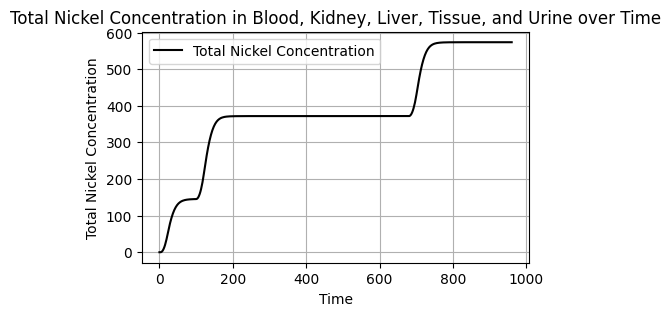

In [ ]:
# Calculate the total concentration over blood, kidney, liver, tissue, and urine
total_concentration = solution.y[1] + solution.y[2] + solution.y[3] + solution.y[4] + solution.y[5]

# Plot the total concentration over time
plt.figure(figsize=(5, 3))
plt.plot(solution.t, total_concentration, label='Total Nickel Concentration', color='black')

# Plot formatting
plt.xlabel('Time')
plt.ylabel('Total Nickel Concentration')
plt.title('Total Nickel Concentration in Blood, Kidney, Liver, Tissue, and Urine over Time')
plt.legend()
plt.grid()
plt.show()